In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from time import time

import numpy as np
import pandas as pd
import pylab as pl
from sklearn import (cluster, datasets, decomposition, ensemble, manifold, random_projection)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D # needed to modify the way figure behaves

from PIL import Image
import os

In [3]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

In [4]:
def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)


### Part 1
** __ Using PCA __ **
___

In [5]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [6]:
X = pd.DataFrame([im.histogram() for im in images])

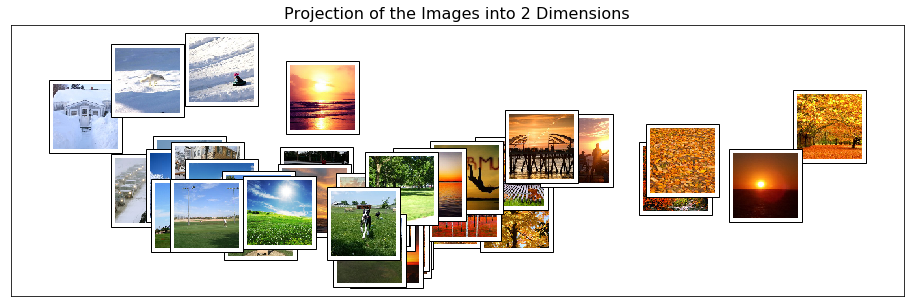

In [9]:
# global centering
X_centered = X - X.mean()

# decomposition for scikit learn
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)
plot_image_space(images, X_pca)

### Part 2
___

+  What does it mean for two images to be close together in this plot? What does it mean for two images to be far apart?

>>    + ** _If two images are together if means that they share similar color characteristics. The blueish, white tone images are ploted on the left hand of the plot, which the warmer tones are also together on the opposite side. This also shows that for two images to be far apart they share different color characteristics_ **


+ Do images that represent the same season tend to group together more closely than other? Why is this ?

>>    + ** _Images that represent the same season do not tend to be close togetether. We can see that the fall season images are spread out. This could be due to the fact that the images from the same season can have different color characteristics, for example a picture taken in the morning could have different hues from another image taken in the afternoon and consequently the color pixels would drastical differ and place the two _ **

### Part 3


+ ** Attempt to use PCA **
+ ** Using Curated Images of Video Game titles scalled to 725 * 410 max pixels **
___

In [11]:
img_dir = os.path.join(os.getcwd(), "curated_images") # directory path
curated_images = load_images(img_dir) # load images in the specified directory

In [20]:
curated_X = pd.DataFrame([im.histogram() for im in curated_images])

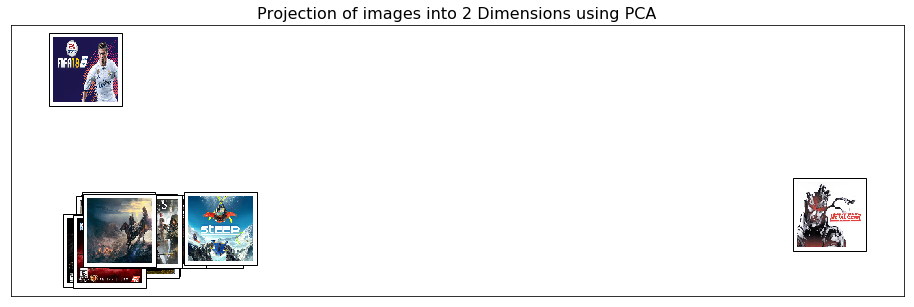

In [80]:
# global centering
X_curated_centered = curated_X - curated_X.mean()

# decomposition for scikit learn
pca = decomposition.PCA(n_components=2)
X_curated_pca = pca.fit_transform(X_curated_centered)
plot_image_space(curated_images, X_curated_pca, title="Projection of images into 2 Dimensions using PCA")

+ ** Using Locally Linear Embedding (LLE)¶**
___

In [78]:
clf = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard')
X_lle = clf.fit_transform(curated_X)


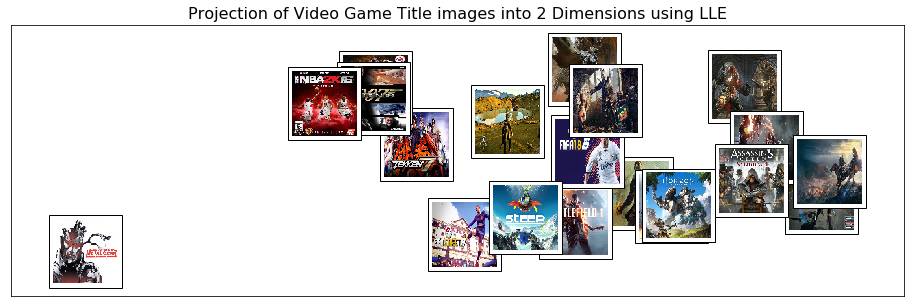

In [79]:
plot_image_space(curated_images, X_lle, title="Projection of Video Game Title images into 2 Dimensions using LLE")

### Differences and Similarities between PCA (season images ) and LLE (curated images)

+ While PCA was able to successfully separate the data visually, the results were not as refined as when i applied the LLE method. Even when i tried to use PCA for the game titles, it was not as effective as LLE in identifying the separations. I suspect this is because PCA performs linear combinations of original features and LLE is performing a more localized combination between two data points. 